In [1]:
#List of numbers

data = [50,50,47,97,3,53,42,26,74,82,62,37]

print(data)

[50, 50, 47, 97, 3, 53, 42, 26, 74, 82, 62, 37]


In [2]:
#Using Python Library Numpy

import numpy as np

grades = np.array(data)
print(grades)

[50 50 47 97  3 53 42 26 74 82 62 37]


Numpy support mathematical operations than a List do

In [3]:
#Difference bettwen List and Array

print(type(data), 'x2: ', data*2)
print('------')
print(type(grades), 'x 2: ', grades*2)

<class 'list'> x2:  [50, 50, 47, 97, 3, 53, 42, 26, 74, 82, 62, 37, 50, 50, 47, 97, 3, 53, 42, 26, 74, 82, 62, 37]
------
<class 'numpy.ndarray'> x 2:  [100 100  94 194   6 106  84  52 148 164 124  74]


In [4]:
grades.shape

#It has one dimension and 12 elements
# numpy ndarray means n(number)-dimension of array

(12,)

In [5]:
#get the average of array
grades.mean()

51.916666666666664

In [6]:
#get an array element based off its ordinal position
grades[0]

50

Creation of 2D Array

In [7]:
study_hours =[10.0, 11.5, 9.25, 1.0, 11.5, 13.75, 9.0, 8.0, 15.5, 8.0, 9.0, 6.0]

student_data = np.array([study_hours, grades])
student_data
print(student_data.shape)

(2, 12)


In [8]:
student_data[0][0]

10.0

Get the mean value of each sub Array

In [9]:
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print('Average study hours: {:.2f} \n Average Grade: {:.2f}'.format(avg_study, avg_grade))

Average study hours: 9.38 
 Average Grade: 51.92


Tabular Data with Pandas

In [10]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca','Nath'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students 

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.25,47.0
3,Rosie,1.00,97.0
4,Ethan,11.50,3.0
5,Vicky,13.75,53.0
6,Frederic,9.00,42.0
7,Jimmie,8.00,26.0
8,Rhonda,15.50,74.0
9,Giovanni,8.00,82.0


In [11]:
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.25,47.0
3,Rosie,1.00,97.0
4,Ethan,11.50,3.0
5,Vicky,13.75,53.0


In [12]:
#the one I use
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.25,47.0
3,Rosie,1.00,97.0
4,Ethan,11.50,3.0


In [13]:
#[row, [columns]]

df_students.iloc[0:,[1,2]]

,StudyHours,Grade
0,10.00,50.0
1,11.50,50.0
2,9.25,47.0
3,1.00,97.0
4,11.50,3.0
5,13.75,53.0
6,9.00,42.0
7,8.00,26.0
8,15.50,74.0
9,8.00,82.0


Get Data from Github

In [14]:
grade = ('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv')
df_students= pd.read_csv(grade, delimiter=',', header='infer' )
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


Rows and Column with null value

In [15]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [16]:
#get exactly columns with null values
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [17]:
#FILLNA with column average

df_students['StudyHours'] = df_students['StudyHours'].fillna(df_students['StudyHours'].mean())

df_students.isnull().sum()

Name          0
StudyHours    0
Grade         2
dtype: int64

In [18]:
#DROPNA of rows with any nan

df_students = df_students.dropna(axis=0, how = 'any')
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

DATA EXPLORATION

In [19]:
mean_study = df_students['StudyHours'].mean()
mean_grade = df_students['Grade'].mean()

print('Average weekly study hours: {:.2f}\n Average grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
 Average grade: 49.18


In [20]:
#Students that studied more than mean study

df_students[df_students['StudyHours'] >mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


Assume the passing grade is 60

Create a pandas series that has the pass/fail indicator and concatenate the series as a new column in the DataFrame

In [21]:
#create series 
passes_series = pd.Series(df_students['Grade'] >= 60)

#concate to df
df_students = pd.concat([df_students, passes_series.rename('Pass')], axis=1)
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


GROUPBY

In [22]:
#groupby by pass column using the different names to count the students that either passed or failed

print(df_students.groupby(df_students['Pass'])['Name'].count())

Pass
False    15
True      7
Name: Name, dtype: int64


In [23]:
print(df_students.groupby(df_students['Pass'])['StudyHours', 'Grade'].mean())

       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


C:\Users\Iremide\AppData\Local\Temp/ipykernel_11220/1691427002.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students['Pass'])['StudyHours', 'Grade'].mean())


Visualization

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

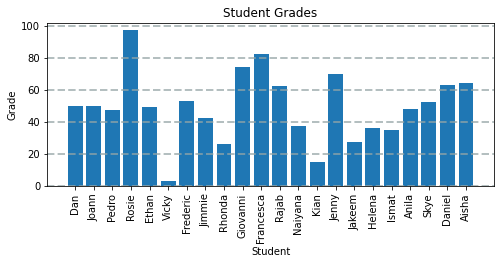

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#create a figure
fig = plt.figure(figsize=(8,3))


plt.bar(x = df_students['Name'], height= df_students['Grade'])

#Customize Chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)



C:\Users\Iremide\AppData\Local\Temp/ipykernel_11220/1281300378.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)


Text(0.5, 0.98, 'Student Data')

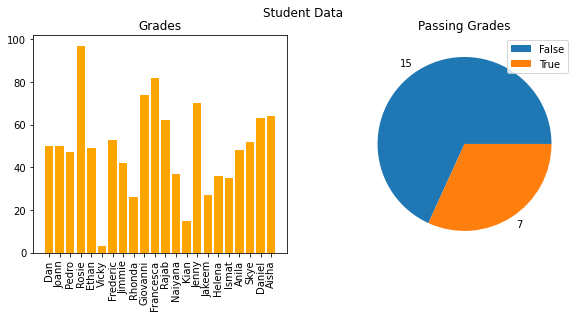

In [25]:
#Create a figure for 2 subplot(1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

#Create a barplot of names and grade on first axes
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)


# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')


Text(0, 0.5, 'Frequency')

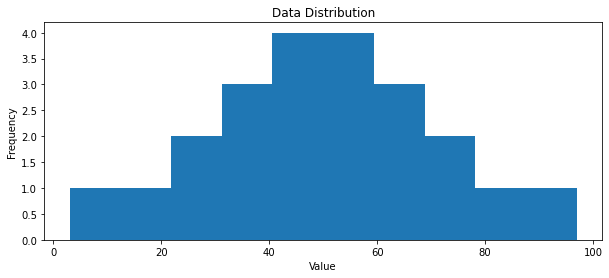

In [26]:
#Plot Histogram

# Copy the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [27]:
# Copy the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))



Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



Text(0, 0.5, 'Frequency')

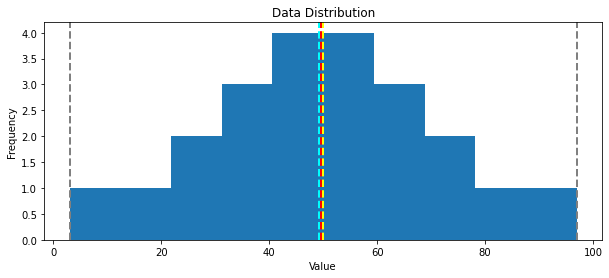

In [28]:
# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Data Distribution')

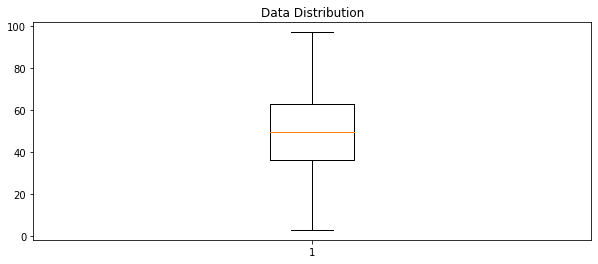

In [29]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a Boxplot
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')


Plot Histogram and Barplot Together by Creating a function


In [30]:
# Create a function that we can re-use
def show_distribution(var_data):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram on row1
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot on row2
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')



Call Function

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



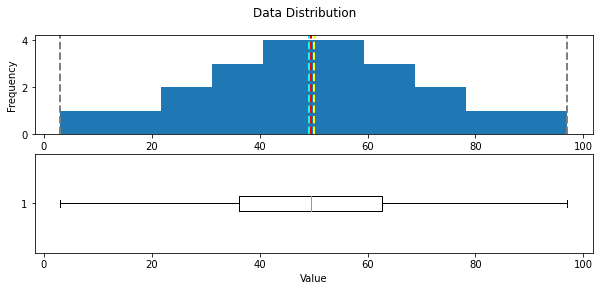

In [31]:
# Get the variable to examine
col1 = df_students['Grade']
#col2= df_students['StudyHours']
# Call the function
show_distribution(col1)
#show_distribution(col2)

The study time data is different from that of the grades. 

The Box plot begins at 6.0 indicating that vest majority of its first quarter is above this value. It also has an outlier at 1

Create another function to plot density curve

In [32]:
def show_density(var_data):

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)


CALL FUNCTION

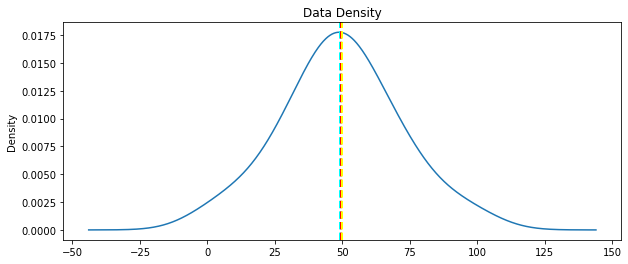

In [33]:
# Get the density of Grade
col = df_students['Grade']
show_density(col)

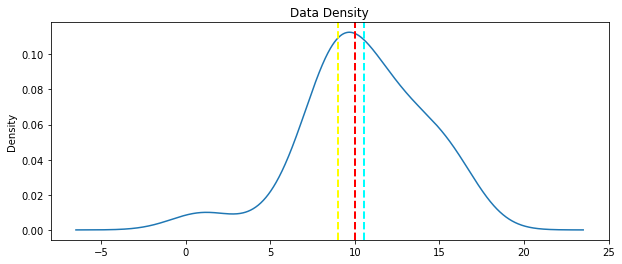

In [34]:
# Get the density of StudyHour
col= df_students['StudyHours']
show_density(col)

Analysis without the one outlier in StudyHours

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



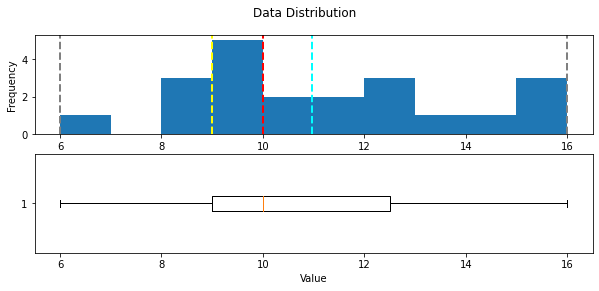

In [35]:
#Since the outlier said the student studied for just one hour, we will check for students that studied for more than one hour
col = df_students[df_students['StudyHours'] >1]['StudyHours'] 

#plot
show_distribution(col)

OR FOR LARGE DATA USE:

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



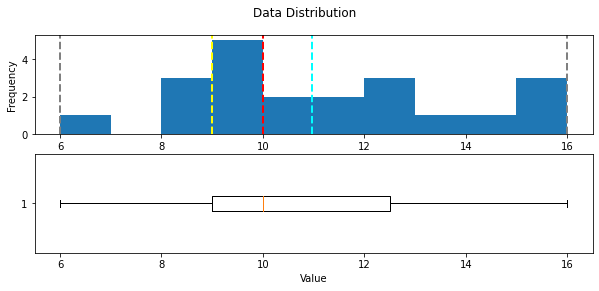

In [36]:
#For below 1% of the data to be excluded

q01= df_students['StudyHours'].quantile(0.01)
col= df_students[df_students['StudyHours'] > q01]['StudyHours']
show_distribution(col)

In [37]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))
    


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Relationship between standard deviation in a normal distribution

(-53.4, 153.4, -0.0008871824140160387, 0.018641745957549728)

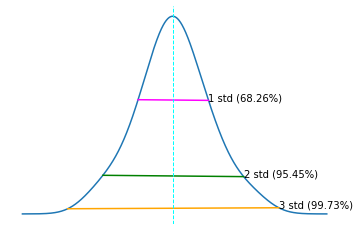

In [38]:
#plt.plot plots a straight line of x and y axis

import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

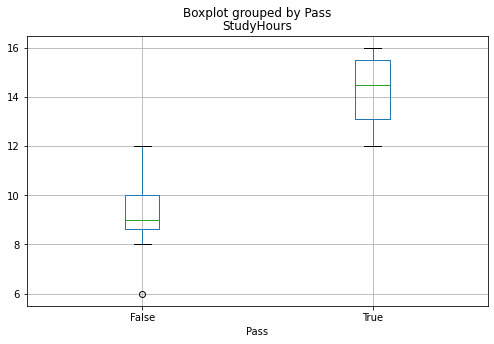

In [39]:
#Visualize a categorical column 
#get data while eliminating the outlier found earlier
df_sample = df_students[df_students['StudyHours']>1]

#Plot
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<AxesSubplot:xlabel='Name'>

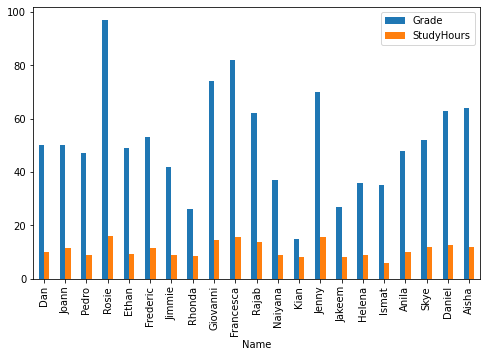

In [40]:
#Numerical Viz
# Create a bar plot of name vs grade and study hours
#pandas plot
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

To standardize numeric column / Normalize using MinMax scale

<AxesSubplot:xlabel='Name'>

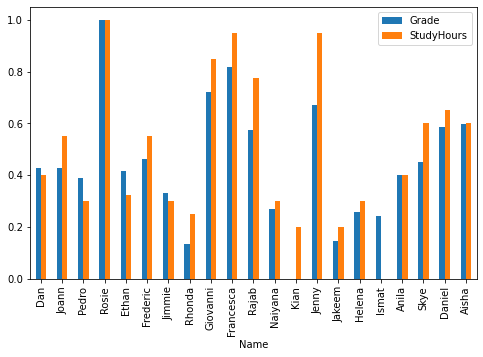

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

#Normalize numeric column
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

Correlation between Grade and StudyHour

In [42]:
#check the corr between grade and studyhour

df_normalized['Grade'].corr(df_normalized['StudyHours'])

0.9117666413789675

<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

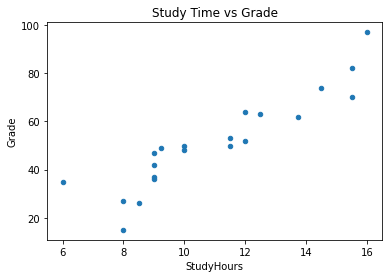

In [43]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

Linear Regression to check the actual vs predicted grades using y= mx+c

i.e slop and intercept while inputing new values to predict

 The SciPy package includes a stats class that provides a linregress method to do the hard work for you. This returns (among other things) the coefficients you need for the slope equation - slope (m) and intercept (b) based on a given pair of variable samples you want to compare.

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


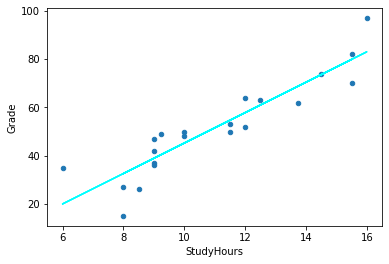

In [44]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs Salary
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')


In [45]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


In [46]:
#Get the slope and intercept
print("Slope is: ",m)
print("Intercept is: ",b)


Slope is:  6.31342563379236
Intercept is:  -17.91640993281615


In [47]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70
